<a href="https://colab.research.google.com/github/lolhi/ML_Lec/blob/master/Hands-On%20Machine%20Learning/chap%204/4_3_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>## 라이브러리 사용
- import numpy as np
  - Numpy를 사용하기 위해 import 해준다
- from matplotlib import pyplot as plt
  - pyplot을 사용하기 위해 import 해준다.
- from sklearn.preprocessing import PolynomialFeatures
  - PolynomialFeatures 함수를 사용하기 위해 import 해준다.
- from sklearn.linear_model import LinearRegression
  - LinearRegression 함수를 사용하기 위해 import 해준다

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

>## 모델 생성
- $\hat y = 0.5x^2+x+2+Gaussian\, noise$ 의 모델을 만든다. 


>---


>- np.random.rand(100,1)
  - 0~1 사이의 값을 [100,1]로 난수 생성
- np.random.randn(100,1)
  - 평균 0, 표준편차 1인 값을 [100,1]로 난수 생성
- PolynomialFeatures(degree = n, include_bias = True | False, interaction_only = True | False)
  -  n항 차수 변환 및 교호작용 변수 생성
  - include_bias = True를 옵션으로 주면 편향 특성$x_0 = 1$이 추가
  - interaction_only = True를 옵션으로 주면 교호작용 변수만 생성
- X_poly = poly_features.fit_transform(X)
  - 데이터 X를 n차항이 적용된 다항 회귀 모델로 변형


X.shape :  (100, 1) 
y.shape :  (100, 1)


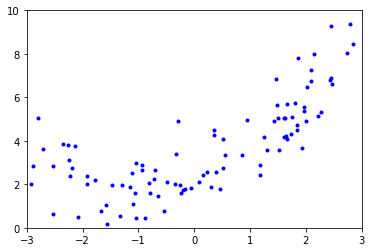

In [0]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100,1)

print('X.shape : ', X.shape, '\ny.shape : ', y.shape)
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

#사이킷런 사용
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#사이킷런 미사용
#X_poly = np.array(X**2)
#X_poly = np.c_[X, X_poly]



>## 사이킷런을 이용한 다항회귀모델 추정
- 사이킷런의 LinearRegression 함수등을 사용하여 다항 회귀 모델 추정

>---

>- LinearRegression()
  - 사이킷런에서 제공하는 LinearRegression 클래스
  - Attribute
    - intercept_ : 상수항 출력
    - coef_ : 계수 출력
  - 함수
    - fix(X,y) : Fit linear model
    - get_params(self, deep=True) : Get parameters for this estimator.
    - predict(self, X) : Predict using the linear model
    - score(self, X, y, sample_weight=None) : Returns the coefficient of determination R^2 of the prediction.
    - set_params(self, **params) : Set the parameters of this estimator.

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.21396035]), array([[0.97739687, 0.48652779]]))


>## 배치 경사하강법을 이용한 선형 회귀모델 추정
>- 배치 경사하강법을 사용하기 위해 선형 회귀 모델의 성능지표인 MSE를 $\theta$로 편미분 한다.
  - $\nabla_\theta MSE(\theta) = 2/m*X^T \cdot (X \cdot \theta - y)$


In [0]:
#X_b = np.c_[np.ones((100,1)), X_poly]
#learning_rate = 0.01

#n_epoch = 1000

#theta = np.random.randn(3,1)

#for epoch in range (n_epoch):
#    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
#    theta = theta - learning_rate * gradients

>## 추정결과 확인
- $\theta_0 = 2$, $\theta_1 = 1, \theta_2=0.5$을 기대하였으나 가우시안 노이즈 때문에 정확하게 재현 못함

In [0]:
#theta

array([[2.12162846],
       [1.0235173 ],
       [0.48297888]])

>## 구한 선형회귀식을 이용하여 예측
- np.linspace(a,b,m)
  - a~b까지 구간을 m개로 나눈 배열을 반환하는 함수
- lin_reg.predict(X_new_poly)
  - 132

In [0]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
#사이킷런 사용
X_new_poly = poly_features.transform(X_new)
y_predict = lin_reg.predict(X_new_poly)

#사이킷런 미사용
#X_new_sq = np.array(X_new**2)
#X_new_poly = np.c_[X_new, X_new_sq]

#X_new_b = np.c_[np.ones((100, 1)), X_new_poly]

#y_predict = X_new_b.dot(theta)

>## 선형 회귀 모델 표현
- python의 plot을 이용하여 출력

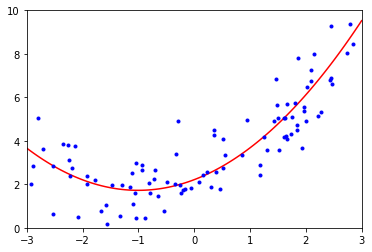

In [0]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()